In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import random

In [10]:
(x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


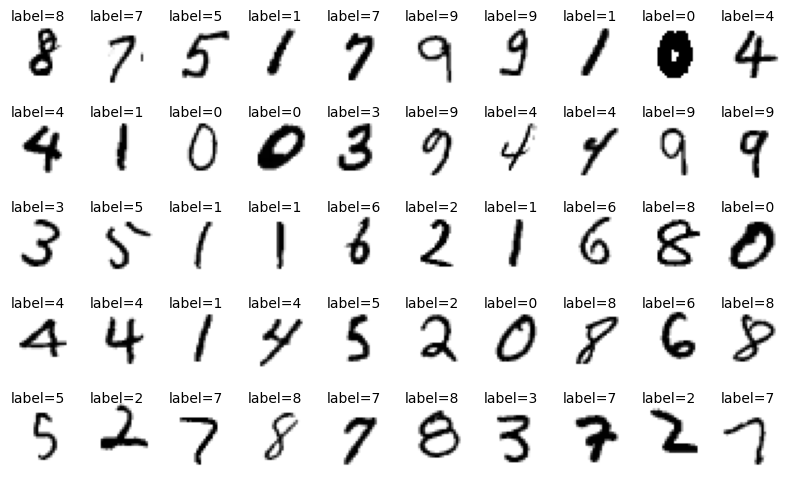

In [11]:
fig,axs=plt.subplots(5,10,figsize=(10,6))
m=x_train.shape[0]
for i in range(5):
    for j in range(10):
        idx=random.randint(0,m)
        axs[i,j].imshow(x_train[idx],cmap="gray_r")
        axs[i,j].axis("off")
        axs[i,j].text(0,0,f"label={y_train[idx]}")
plt.show()

In [12]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

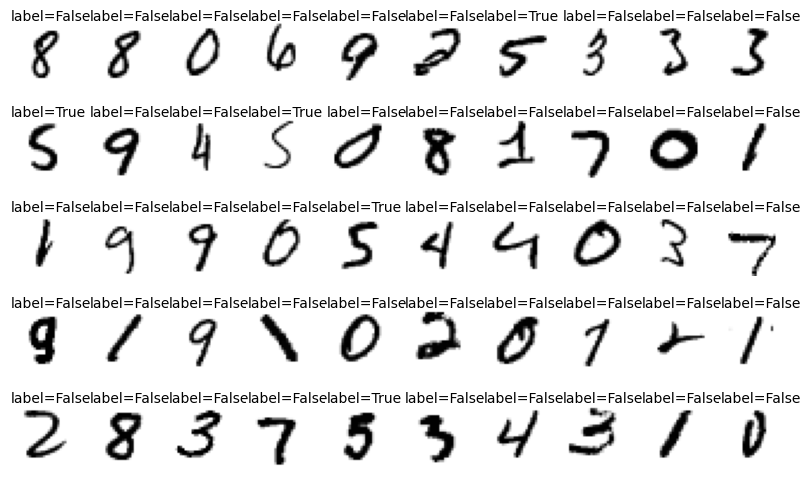

In [13]:
fig,axs=plt.subplots(5,10,figsize=(10,6))
m=x_train.shape[0]
for i in range(5):
    for j in range(10):
        idx=random.randint(0,m)
        axs[i,j].imshow(x_train[idx],cmap="gray_r")
        axs[i,j].axis("off")
        axs[i,j].text(0,0,f"label={y_train_5[idx]}")
plt.show()

In [16]:
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))

In [14]:
from sklearn.linear_model import SGDClassifier

In [17]:
model=SGDClassifier(random_state=42)
model.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
acc_train=cross_val_score(model,x_train,y_train_5,cv=3,scoring="accuracy")
acc_train

array([0.95035, 0.96035, 0.9604 ])

In [20]:
acc_test=cross_val_score(model,x_test,y_test_5,cv=3,scoring="accuracy")
acc_test

array([0.95110978, 0.95439544, 0.96879688])

Confusion Matrix

In [21]:
from sklearn.model_selection import cross_val_predict

In [22]:
y_hat=cross_val_predict(model,x_train,y_train_5,cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm=confusion_matrix(y_train_5,y_hat)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [25]:
y_hat=cross_val_predict(model,x_test,y_test_5,cv=3)
cm=confusion_matrix(y_test_5,y_hat)
cm

array([[8936,  172],
       [ 247,  645]], dtype=int64)

# Precision, Recall, F1

Precision = TP / (FP + TP)

Recall = TP / (FN + TP)

In [26]:
cm[1,1]/(cm[0,1]+cm[1,1])

0.7894736842105263

In [27]:
cm[1,1]/(cm[1,0]+cm[1,1])

0.7230941704035875

In [28]:
from sklearn.metrics import precision_recall_curve

In [43]:
y_scores=cross_val_predict(model,x_test,y_test_5,cv=3,method="decision_function")

In [44]:
precisions,recalls,tresholds=precision_recall_curve(y_test_5,y_scores)

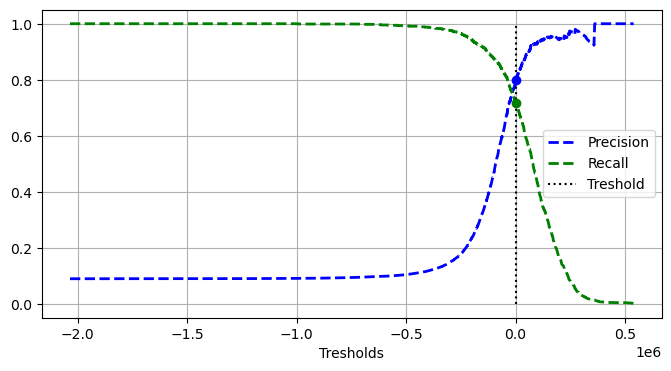

In [49]:
plt.figure(figsize=(8,4))
plt.plot(tresholds,precisions[:-1],"b--",label="Precision",linewidth=2)
plt.plot(tresholds,recalls[:-1],"g--",label="Recall",linewidth=2)
plt.vlines(3000,0,1.0,"k","dotted",label="Treshold")

idx=(tresholds>=3000).argmax()
plt.plot(tresholds[idx],precisions[idx],"bo")
plt.plot(tresholds[idx],recalls[idx],"go")
# plt.axis([-1000000,500000,0,1.1])
plt.grid()
plt.xlabel("Tresholds")
plt.legend(loc="center right")

plt.show()